In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [2]:
dataset = pd.read_csv('MSFT.csv',index_col="Date",parse_dates=True)

In [3]:
dataset.head()


,Open,High,Low,Close,Volume
Date,,,,,
1986-03-13,0.056514,0.064825,0.056514,0.062055,1031788800
1986-03-14,0.062055,0.065379,0.062055,0.064271,308160000
1986-03-17,0.064271,0.065933,0.064271,0.065379,133171200
1986-03-18,0.065379,0.065933,0.063163,0.063717,67766400
1986-03-19,0.063717,0.064271,0.062055,0.062609,47894400


In [4]:
dataset.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8713 entries, 1986-03-13 to 2020-10-05
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    8713 non-null   float64
 1   High    8713 non-null   float64
 2   Low     8713 non-null   float64
 3   Close   8713 non-null   float64
 4   Volume  8713 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 408.4 KB


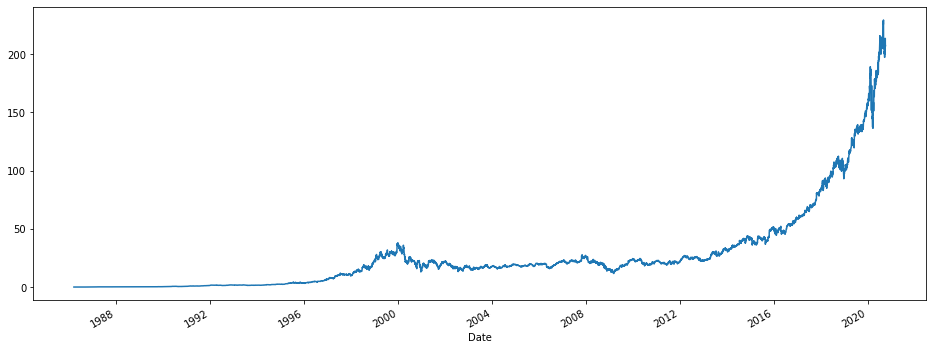

In [6]:
dataset['Open'].plot(figsize=(16,6))

In [7]:
# 7 day rolling mean
dataset.rolling(7).mean().head(20)

,Open,High,Low,Close,Volume
Date,,,,,
1986-03-13,NaN,NaN,NaN,NaN,NaN
1986-03-14,NaN,NaN,NaN,NaN,NaN
1986-03-17,NaN,NaN,NaN,NaN,NaN
1986-03-18,NaN,NaN,NaN,NaN,NaN
1986-03-19,NaN,NaN,NaN,NaN,NaN
1986-03-20,NaN,NaN,NaN,NaN,NaN
1986-03-21,0.062213,0.064430,0.060947,0.062609,2.438866e+08
1986-03-24,0.062609,0.063638,0.061026,0.061976,1.058153e+08
1986-03-25,0.061976,0.062688,0.060314,0.061184,6.637577e+07


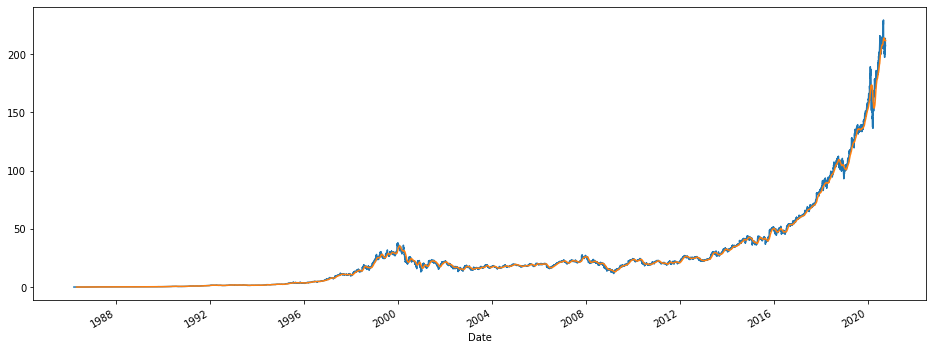

In [8]:
dataset['Open'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['Close'].plot()

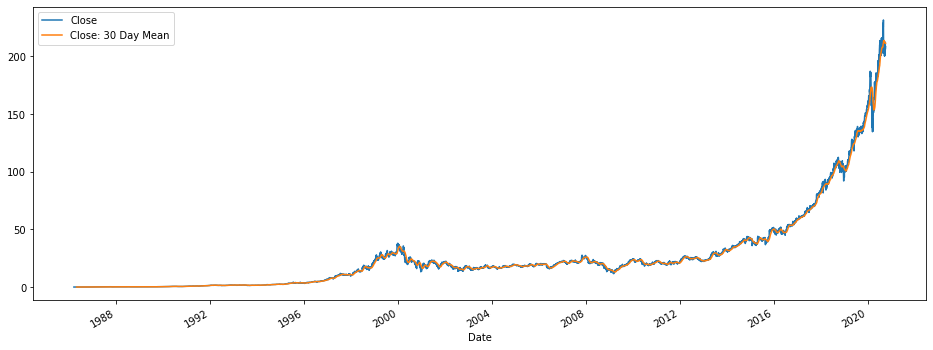

In [9]:
dataset['Close: 30 Day Mean'] = dataset['Close'].rolling(window=30).mean()
dataset[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))

In [10]:
training_set=dataset['Open']
type(training_set)

pandas.core.series.Series

In [11]:
training_set= training_set[:int(len(training_set)*(4/5))]
training_set=pd.DataFrame(training_set)
type(training_set)
training_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6970 entries, 1986-03-13 to 2013-10-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    6970 non-null   float64
dtypes: float64(1)
memory usage: 108.9 KB


In [12]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [13]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [14]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [15]:
# Initialising the RNN
regressor = Sequential()

In [16]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))



In [17]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
6910/6910 [==============================] - 21s 3ms/step - loss: 0.0058
Epoch 2/100
6910/6910 [==============================] - 23s 3ms/step - loss: 0.0024
Epoch 3/100
6910/6910 [==============================] - 25s 4ms/step - loss: 0.0021
Epoch 4/100
6910/6910 [==============================] - 23s 3ms/step - loss: 0.0017
Epoch 5/100
6910/6910 [==============================] - 24s 3ms/step - loss: 0.0017
Epoch 6/100
6910/6910 [==============================] - 25s 4ms/step - loss: 0.0015
Epoch 7/100
6910/6910 [==============================] - 23s 3ms/step - loss: 0.0013
Epoch 8/100
6910/6910 [==============================] - 25s 4ms/step - loss: 0.0013
Epoch 9/100
6910/6910 [==============================] - 24s 3ms/step - loss: 0.0012
Epoch 10/100
6910/6910 [==============================] - 24s 3ms/step - loss: 0.0011
Epoch 11/100
6910/6910 [==============================] - 26s 4ms/step - loss: 0.0011
Epoch 12/100
6910/6910 [==============================] - 23s 3

6910/6910 [==============================] - 57s 8ms/step - loss: 5.2915e-04
Epoch 93/100
6910/6910 [==============================] - 56s 8ms/step - loss: 5.2835e-04
Epoch 94/100
6910/6910 [==============================] - 58s 8ms/step - loss: 5.3712e-04
Epoch 95/100
6910/6910 [==============================] - 51s 7ms/step - loss: 5.2463e-04
Epoch 96/100
6910/6910 [==============================] - 52s 8ms/step - loss: 5.4858e-04
Epoch 97/100
6910/6910 [==============================] - 45s 7ms/step - loss: 5.3251e-04
Epoch 98/100
6910/6910 [==============================] - 57s 8ms/step - loss: 5.6010e-04
Epoch 99/100
6910/6910 [==============================] - 53s 8ms/step - loss: 5.2277e-04
Epoch 100/100
6910/6910 [==============================] - 55s 8ms/step - loss: 5.2723e-04


In [29]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('MSFT.csv',index_col="Date",parse_dates=True)



In [19]:
dataset_test= dataset['Open']
dataset_test= dataset_test[int(len(dataset_test)*4/5):]
dataset_test.head()

Date
2013-11-01    30.690798
2013-11-04    30.621965
2013-11-05    30.794044
2013-11-06    32.041638
2013-11-07    32.661138
Name: Open, dtype: float64

In [20]:
#dataset_test.values

In [21]:
real_stock_price= dataset_test[60:]

In [22]:
# Getting the predicted stock price of 2017
inputs = dataset_test.values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [23]:
real_stock_price=pd.DataFrame(real_stock_price)
real_stock_price

,Open
Date,
2014-01-30,31.894523
2014-01-31,32.033231
2014-02-03,32.718122
2014-02-04,32.050579
2014-02-05,31.461055
...,...
2020-09-29,209.350006
2020-09-30,207.729996
2020-10-01,213.490005


In [24]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.rename(columns={'0':"Open2"})
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1683 entries, 0 to 1682
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1683 non-null   float32
dtypes: float32(1)
memory usage: 6.7 KB


In [25]:
df3= predicted_stock_price[0]
df3.values

array([31.852194, 32.559574, 32.606464, ..., 76.25866 , 76.39105 ,
       76.1297  ], dtype=float32)

In [26]:
real_stock_price.insert(1, 'Open2', df3.values, True)

In [27]:
real_stock_price

,Open,Open2
Date,,
2014-01-30,31.894523,31.852194
2014-01-31,32.033231,32.559574
2014-02-03,32.718122,32.606464
2014-02-04,32.050579,33.320789
2014-02-05,31.461055,32.592636
...,...,...
2020-09-29,209.350006,76.268021
2020-09-30,207.729996,76.190506
2020-10-01,213.490005,76.258659


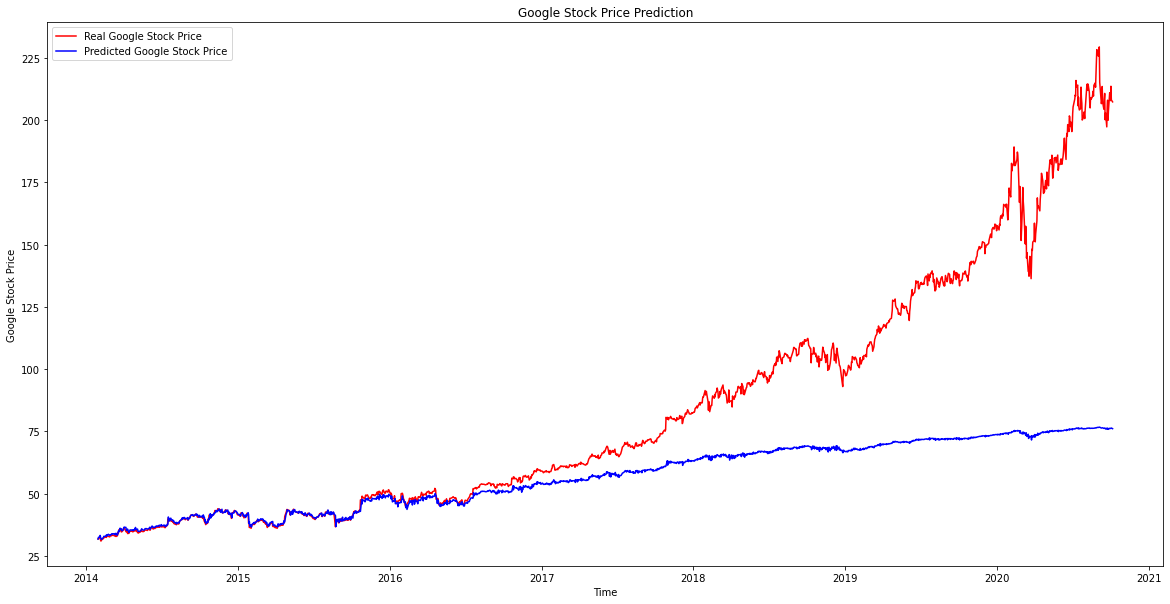

In [28]:

# Visualising the results
plt.figure(figsize=(20,10))
plt.plot(real_stock_price['Open'], color = 'red', label = 'Real Google Stock Price')
plt.plot(real_stock_price['Open2'], color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
